In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def set_fontsize(ax, fs):
    """
    Small function to set font sizes for figures
    """
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.tick_params(axis='both', which='minor', labelsize=fs)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.title.set_size(fs)

In [165]:
%%time
from quantumoperators import *
from hamiltonianoperators import *

Jmax = 6      # max J value in Hamiltonian
I_Tl = 1/2    # I1 in Ramsey's notation
I_F = 1/2     # I2 in Ramsey's notation

HamiltonianJ6 = Hamiltonian(Jmax, I_Tl, I_F)

Wall time: 56.4 s


# Loading Trajectories

In [6]:
from trajectories import *
positions = load_trajectories('positions_545.mat')
velocities = load_velocities('velocities_545.mat')

t, (xT, yT, zT), (xVelocity, yVelocity, zVelocity) = get_time_position_velocity(positions, velocities)

### Interpolation of trajectories

In [7]:
interpolateTrajectories = []
for idInt in range(t.shape[1]):
    interpolateTrajectories.append((make_interpolate(t[:,idInt], xT[:,idInt], yT[:,idInt], zT[:,idInt])))

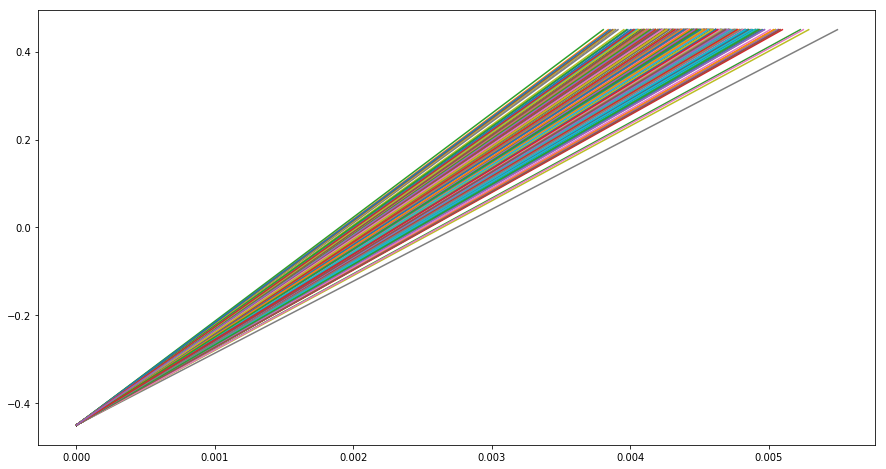

In [8]:
fig, ax = plt.subplots(figsize = (15,8))
for trajx,trajy,trajz,tmax in interpolateTrajectories:
    tInt = np.linspace(0,tmax,201)
    ax.plot(tInt, trajz(tInt))

# Interpolation of Potential
### Quadrupole Potential

In [104]:
from fields import *
c, intfun = fit_potential_xyz('potentialQuadrupole.fld', 0.022, 0.019, 0, 0)

C:\Users\Olivier\Dropbox\Postdoc\Yale\CeNTREX Olivier\TlF Non-Adiabatic Transitions\fields.py:46: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


### Plate Potential

In [105]:
cP, intfunP = fit_potential_xyz('potentialElectrodes.fld', 0.022, 0.019, .45, 0)

C:\Users\Olivier\Dropbox\Postdoc\Yale\CeNTREX Olivier\TlF Non-Adiabatic Transitions\fields.py:46: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


### Total Fields

Text(0.5,1,'Ez')

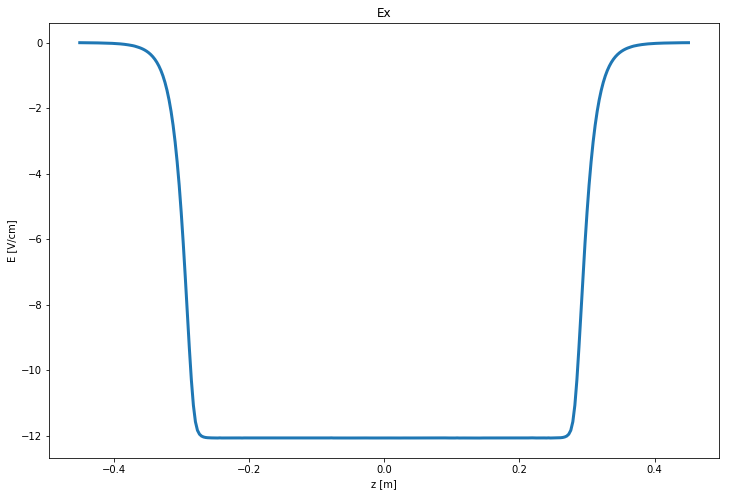

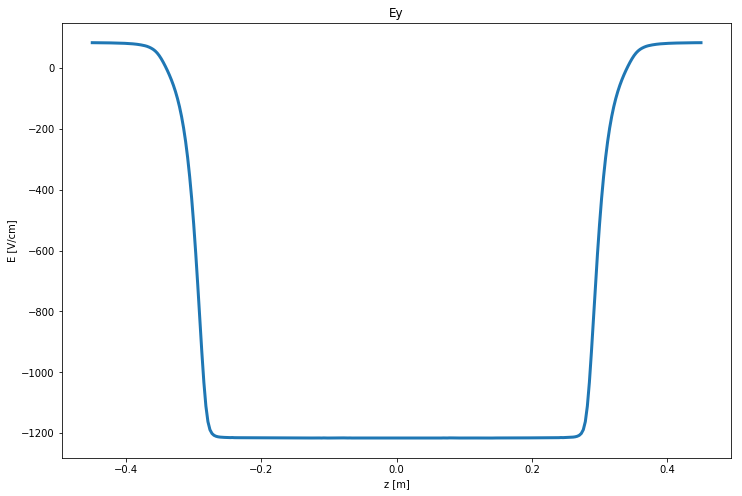

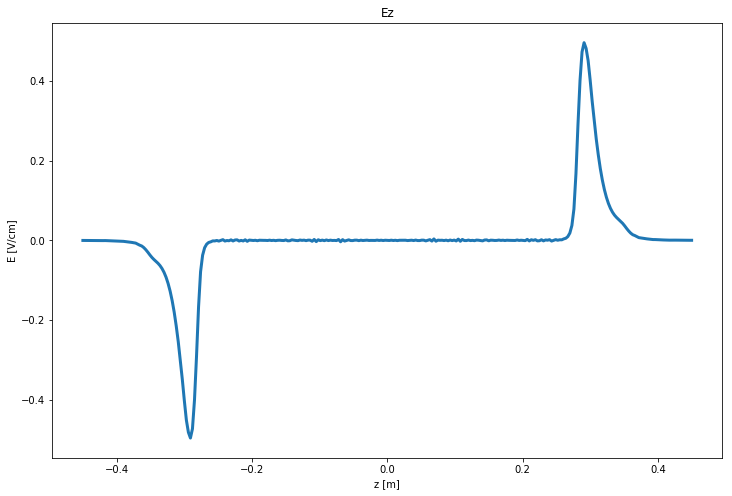

In [106]:
funEx,funEy,funEz,funEmag = combine_quadrupole_plate(c,intfun,cP,intfunP)

xi = 1e-3
yi = 1e-5
zi = np.linspace(-.45, .45, 301)

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(zi, funEx(xi,yi,zi), lw = 3)
ax.set_xlabel('z [m]')
ax.set_ylabel('E [V/cm]')
ax.set_title('Ex')

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(zi, funEy(xi,yi,zi), lw = 3)
ax.set_xlabel('z [m]')
ax.set_ylabel('E [V/cm]')
ax.set_title('Ey')

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(zi,funEz(xi,yi,zi), lw = 3)
ax.set_xlabel('z [m]')
ax.set_ylabel('E [V/cm]')
ax.set_title('Ez')

# Levels

### 0.5 G

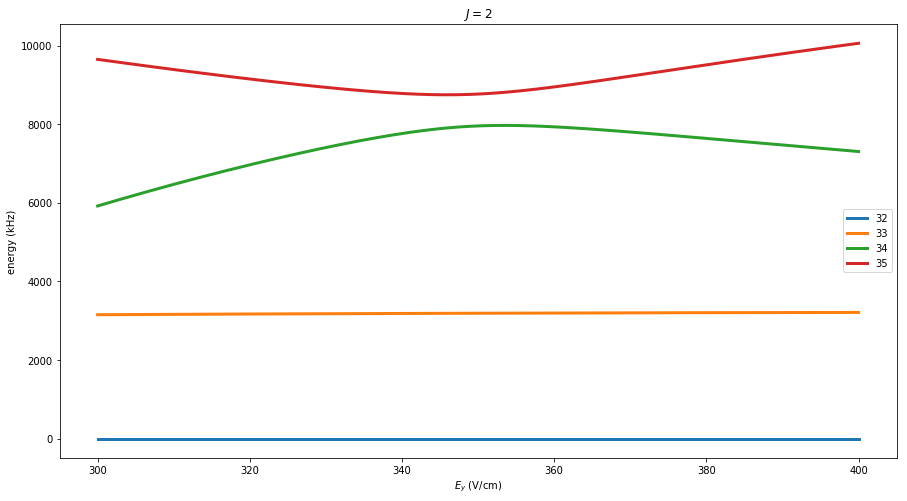

In [156]:
Ey = np.linspace(300,400,1001)
By = 0.5 * np.ones(Ey.shape)
Ex = np.zeros(Ey.shape)
Ez = np.zeros(Ey.shape)
Bx = np.zeros(Ey.shape)
Bz = np.zeros(Ey.shape)

energies, _ = HamiltonianJ6.spectrum(Ex,Ey,Ez,Bx,By,Bz)
del _

for i in range(32,36):
    plt.plot(Ey, energies.T[i]-energies.T[32], label = '{0}'.format(i), lw = 3)
plt.legend()
    
plt.title("$J=2$")
plt.xlabel("$E_y$ (V/cm)")
plt.ylabel("energy (kHz)")

fig = plt.gcf()
fig.set_size_inches(15, 8)

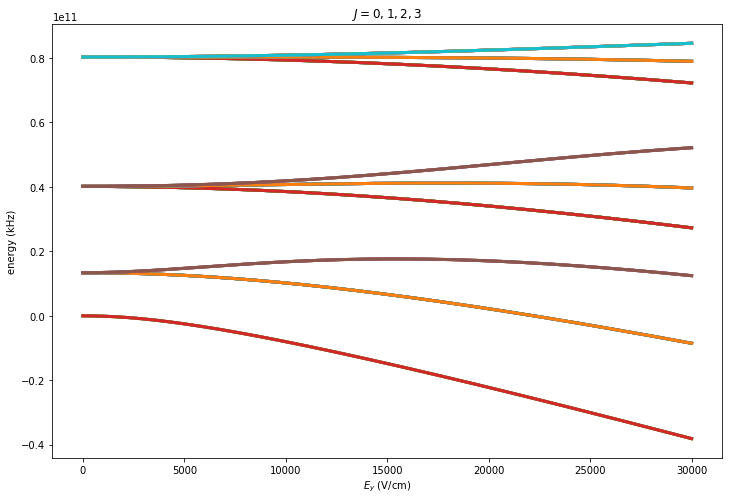

In [158]:
Ey = np.linspace(0,30000,1001)
By = 0.5 * np.ones(Ez.shape)
Ex = np.zeros(Ey.shape)
Ez = np.zeros(Ey.shape)
Bx = np.zeros(Ey.shape)
Bz = np.zeros(Ey.shape)

energies, _ = HamiltonianJ6.spectrum(Ex,Ey,Ez,Bx,By,Bz)
del _

for i in range(0,60):
    plt.plot(Ey, energies.T[i], label = '{0}'.format(i), lw = 3)
    
plt.title("$J=0,1,2,3$")
plt.xlabel("$E_y$ (V/cm)")
plt.ylabel("energy (kHz)")

fig = plt.gcf()
fig.set_size_inches(12, 8)

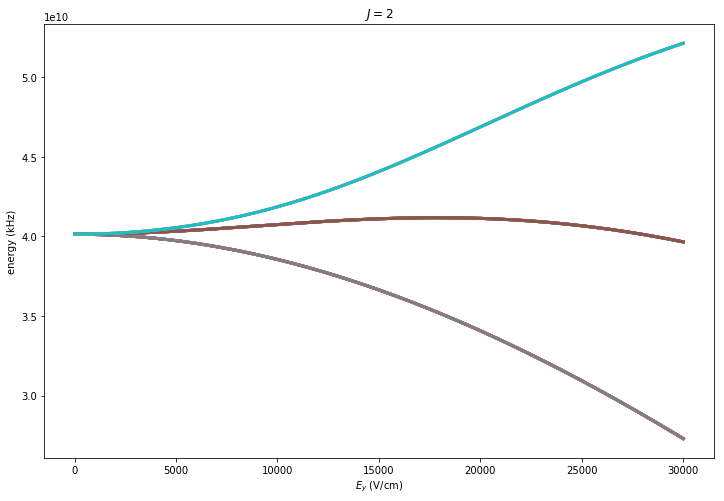

In [159]:
Ey = np.linspace(0,30000,1001)
By = 0.5 * np.ones(Ez.shape)
Ex = np.zeros(Ey.shape)
Ez = np.zeros(Ey.shape)
Bx = np.zeros(Ey.shape)
Bz = np.zeros(Ey.shape)

energies, _ = HamiltonianJ6.spectrum(Ex,Ey,Ez,Bx,By,Bz)
del _

for i in range(16,36):
    plt.plot(Ey, energies.T[i], label = '{0}'.format(i), lw = 3)
    
plt.title("$J=2$")
plt.xlabel("$E_y$ (V/cm)")
plt.ylabel("energy (kHz)")

# plt.xlim([0,10])
# plt.ylim([105,107])
# plt.ylim([135,150])

fig = plt.gcf()
fig.set_size_inches(12, 8)

### 20 G

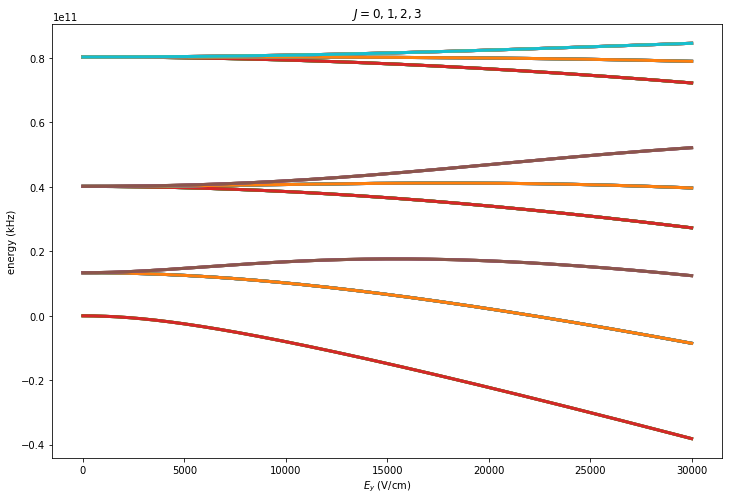

In [160]:
Ey = np.linspace(0,30000,1001)
By = 20 * np.ones(Ez.shape)
Ex = np.zeros(Ey.shape)
Ez = np.zeros(Ey.shape)
Bx = np.zeros(Ey.shape)
Bz = np.zeros(Ey.shape)

energies, _ = HamiltonianJ6.spectrum(Ex,Ey,Ez,Bx,By,Bz)
del _

for i in range(0,60):
    plt.plot(Ey, energies.T[i], label = '{0}'.format(i), lw = 3)
    
plt.title("$J=0,1,2,3$")
plt.xlabel("$E_y$ (V/cm)")
plt.ylabel("energy (kHz)")

# plt.xlim([0,10])
# plt.ylim([105,107])
# plt.ylim([135,150])

fig = plt.gcf()
fig.set_size_inches(12, 8)

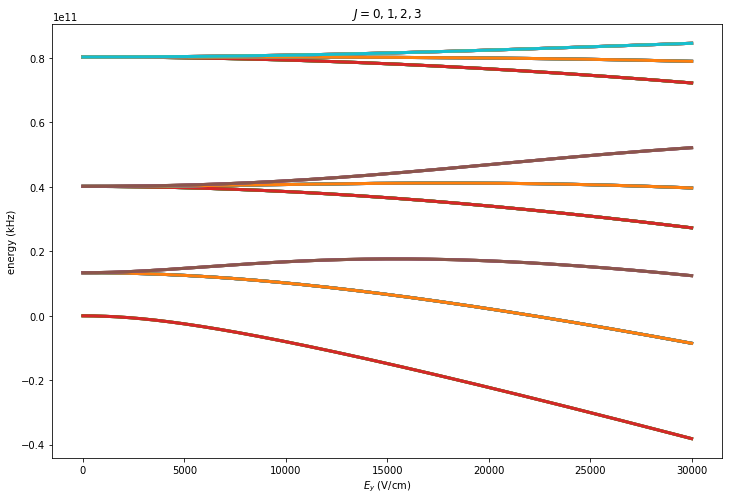

In [161]:
Ey = np.linspace(0,30000,1001)
By = 20 * np.ones(Ez.shape)
Ex = np.zeros(Ey.shape)
Ez = np.zeros(Ey.shape)
Bx = np.zeros(Ey.shape)
Bz = np.zeros(Ey.shape)

energies, _ = HamiltonianJ6.spectrum(Ex,Ey,Ez,Bx,By,Bz)
del _

for i in range(0,60):
    plt.plot(Ey, energies.T[i], label = '{0}'.format(i), lw = 3)
    
plt.title("$J=0,1,2,3$")
plt.xlabel("$E_y$ (V/cm)")
plt.ylabel("energy (kHz)")

# plt.xlim([0,10])
# plt.ylim([105,107])
# plt.ylim([135,150])

fig = plt.gcf()
fig.set_size_inches(12, 8)

## Constant Field Propagation

In [41]:
%%time
from propagation import *
dt = 1e-6
tArray, Hamiltonians, phi, phi0 = propagate_fieldcst_HamArray(HamiltonianJ6, 35, 0.0045, dt, (0, 100, 0), (0, 0.5, 0))

Wall time: 1min 45s


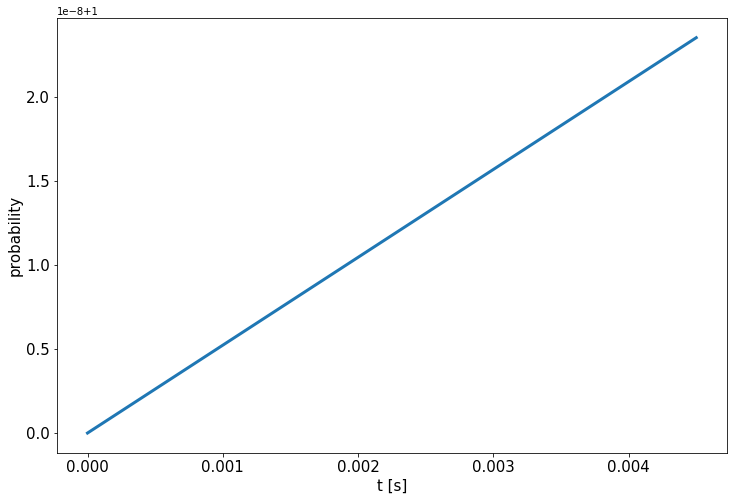

In [42]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(tArray, np.abs(phi**2).sum( axis = 1), lw = 3)
ax.set_ylabel('probability')
ax.set_xlabel('t [s]')
set_fontsize(ax, 15)

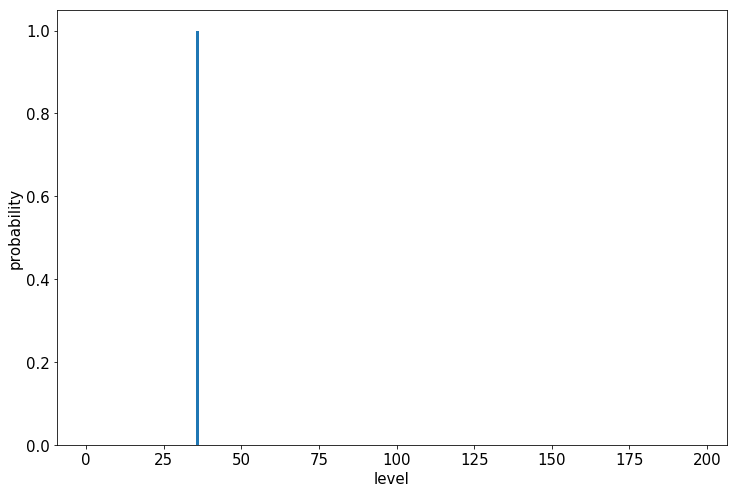

In [43]:
probabilities = calculate_state_probabilities(phi, Hamiltonians[0])

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

# First Trajectory
# Changing dT to check diffferences

### 1e-7 s

0.9933621167152827
Wall time: 25min 44s


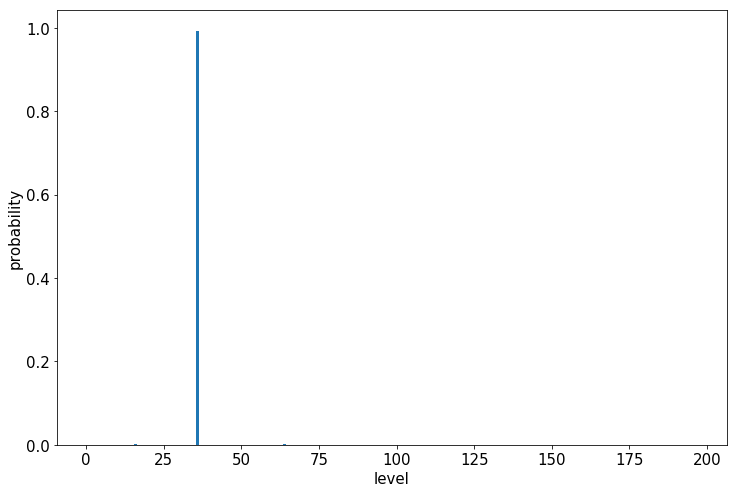

In [57]:
%%time
dt = 1e-7
tArray, Hamiltonians, phi, phi0 = propagate_trajectory_HamArray(HamiltonianJ6, interpolateTrajectories[0], 35, dt, (funEx, funEy, funEz), (0, 0.5, 0))

probabilities = calculate_state_probabilities(phi[-1], Hamiltonians[0])

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi[-1].conj()@phi0)**2)

### 1e-6 s

0.7848445245962209
Wall time: 1min 40s


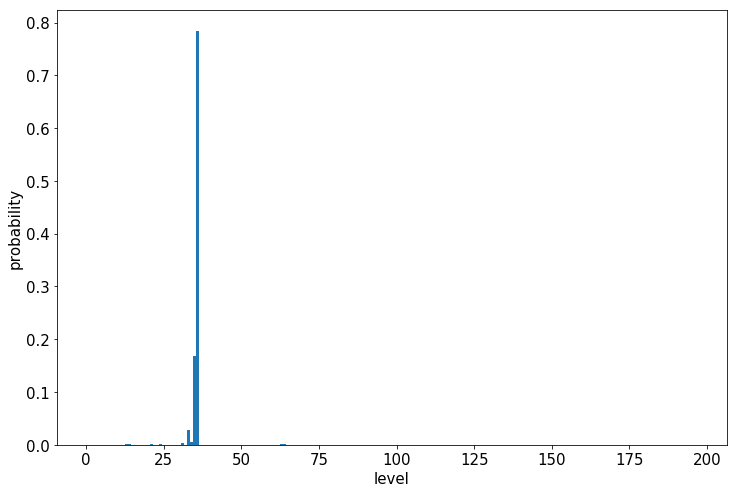

In [94]:
%%time
dt = 1e-6
tArray, Hamiltonians, phi, phi0 = propagate_trajectory_HamArray(HamiltonianJ6, interpolateTrajectories[0], 35, dt, (funEx, funEy, funEz), (0, 0.5, 0))

probabilities = calculate_state_probabilities(phi[-1], Hamiltonians[0])

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi[-1].conj()@phi0)**2)

### 1e-5 s

0.7426688928666892
Wall time: 11.6 s


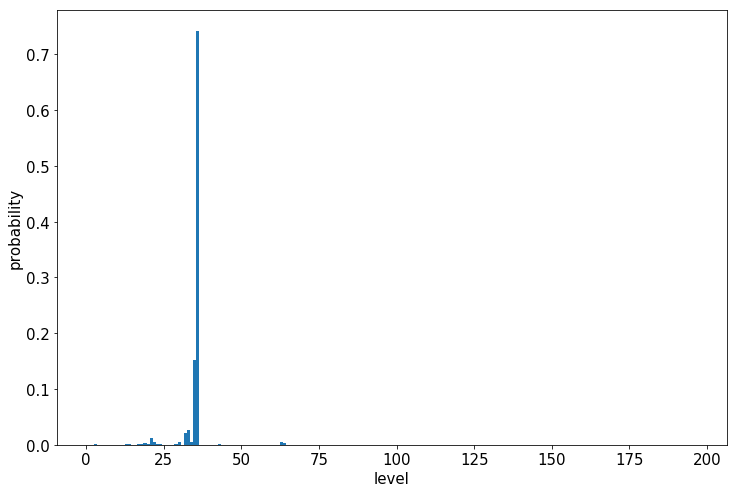

In [95]:
%%time
dt = 1e-5
tArray, Hamiltonians, phi, phi0 = propagate_trajectory_HamArray(HamiltonianJ6, interpolateTrajectories[0], 35, dt, (funEx, funEy, funEz), (0, 0.5, 0))

probabilities = calculate_state_probabilities(phi[-1], Hamiltonians[0])

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi[-1].conj()@phi0)**2)

### 1e-4 s

0.08332764405938695
Wall time: 1.34 s


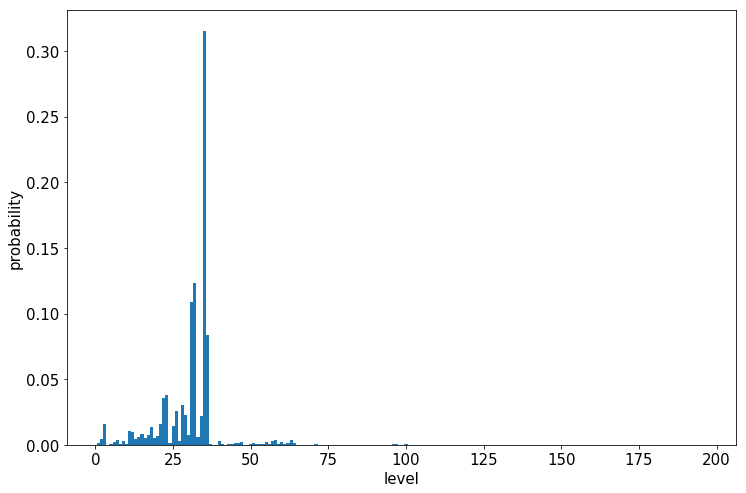

In [97]:
%%time
dt = 1e-4
tArray, Hamiltonians, phi, phi0 = propagate_trajectory_HamArray(HamiltonianJ6, interpolateTrajectories[0], 35, dt, (funEx, funEy, funEz), (0, 0.5, 0))

probabilities = calculate_state_probabilities(phi[-1], Hamiltonians[0])

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi[-1].conj()@phi0)**2)

## Adaptive Timestep
### 1e-7, 1e-6

0.793397569471544
Wall time: 4min 23s


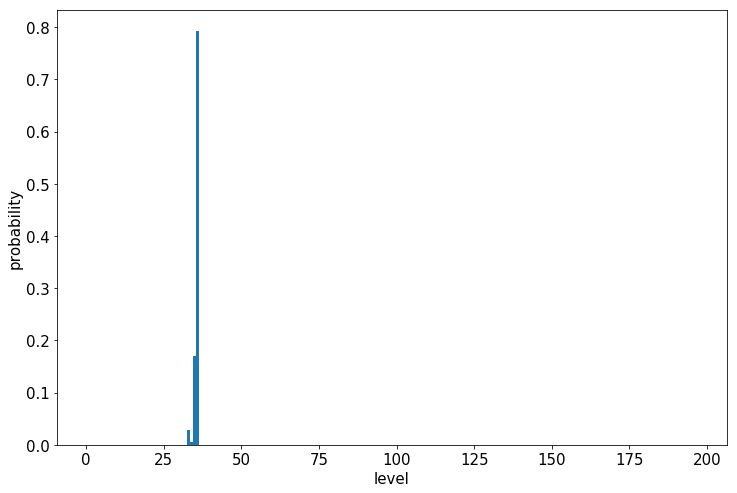

In [167]:
%%time
from propagation import *
funB =  lambda x,y,z: (0, 0.5, 0)
funE = lambda x,y,z: (funEx(x,y,z), funEy(x,y,z), funEz(x,y,z))
H0, phi, phi0 = propagate_adaptive(HamiltonianJ6.create_hamiltonian, interpolateTrajectories[0], funE, funB, 35, (1e-7, 1e-6))

probabilities = calculate_state_probabilities(phi, H0)

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi.conj()@phi0)**2)

### 5e-7, 1e-6

0.7910537416114608
Wall time: 1min 50s


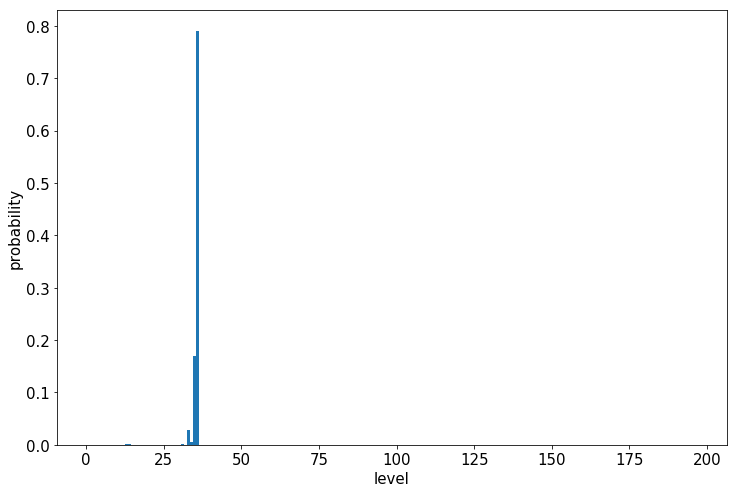

In [168]:
%%time
from propagation import *
funB =  lambda x,y,z: (0, 0.5, 0)
funE = lambda x,y,z: (funEx(x,y,z), funEy(x,y,z), funEz(x,y,z))
H0, phi, phi0 = propagate_adaptive(HamiltonianJ6.create_hamiltonian, interpolateTrajectories[0], funE, funB, 35, (5e-7, 1e-6))

probabilities = calculate_state_probabilities(phi, H0)

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi.conj()@phi0)**2)

### 5e-7, 1e-6 with save

0.7910537416114608
488
Wall time: 2min 26s


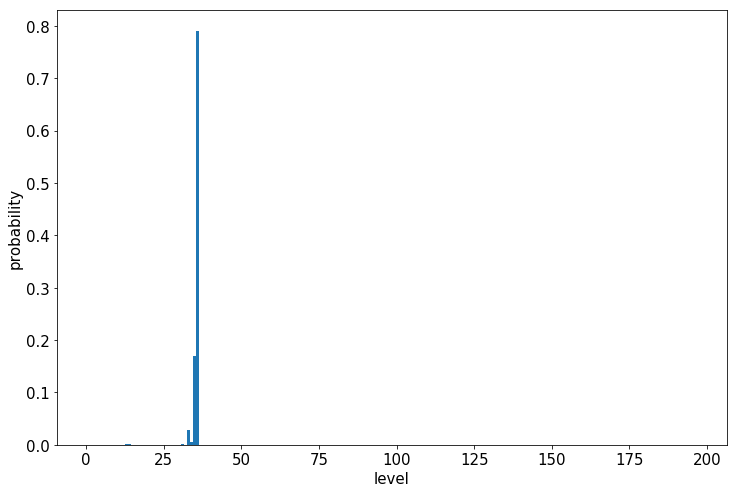

In [184]:
%%time
from propagation import *
funB =  lambda x,y,z: (0, 0.5, 0)
funE = lambda x,y,z: (funEx(x,y,z), funEy(x,y,z), funEz(x,y,z))
t, H, phi = propagate_adaptive_save(HamiltonianJ6.create_hamiltonian, interpolateTrajectories[0], funE, funB, 35, (5e-7, 1e-6), nstep = 10)

probabilities = calculate_state_probabilities(phi[-1], H0)

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi[-1].conj()@phi[0])**2)
print(len(phi))

0.7910537416114608
975
Wall time: 1min 56s


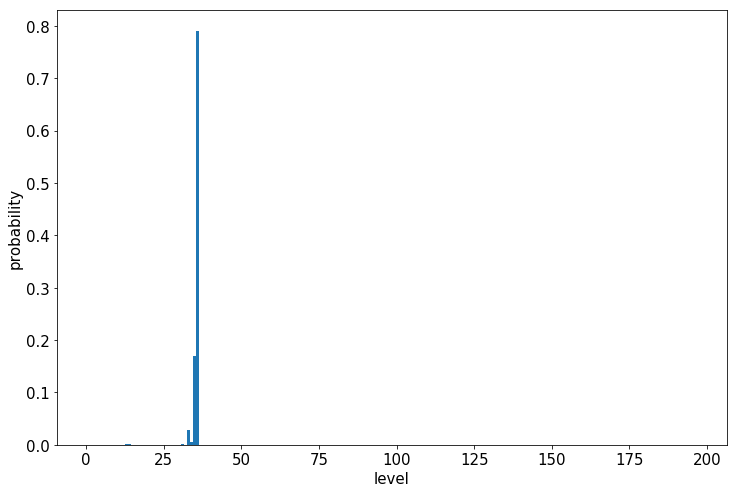

In [185]:
%%time
from propagation import *
funB =  lambda x,y,z: (0, 0.5, 0)
funE = lambda x,y,z: (funEx(x,y,z), funEy(x,y,z), funEz(x,y,z))
t, H, phi = propagate_adaptive_save(HamiltonianJ6.create_hamiltonian, interpolateTrajectories[0], funE, funB, 35, (5e-7, 1e-6), nstep = 5)

probabilities = calculate_state_probabilities(phi[-1], H0)

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi[-1].conj()@phi[0])**2)
print(len(phi))

# Investigating Trajectory #1

0.7910537416114608
2434 2434 2434
Wall time: 1min 58s


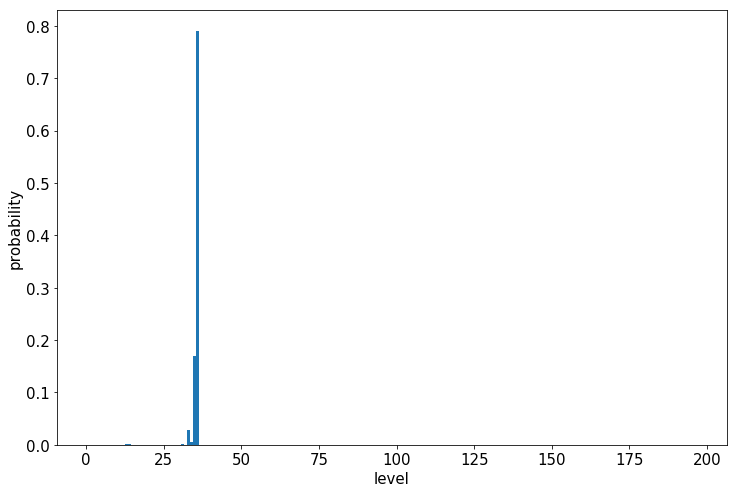

In [187]:
%%time 
from propagation import *
funB =  lambda x,y,z: (0, 0.5, 0)
funE = lambda x,y,z: (funEx(x,y,z), funEy(x,y,z), funEz(x,y,z))
t, H, phi = propagate_adaptive_save(HamiltonianJ6.create_hamiltonian, interpolateTrajectories[0], funE, funB, 35, (5e-7, 1e-6), nstep = 2)

probabilities = calculate_state_probabilities(phi[-1], H[0])

fig, ax = plt.subplots(figsize = (12,8))
ax.bar(np.arange(1,len(probabilities)+1),probabilities, width = 1)
ax.set_xlabel('level')
ax.set_ylabel('probability');
set_fontsize(ax, 15)

print(np.abs(phi[-1].conj()@phi[0])**2)

In [188]:
from order_eigenstates import *

In [189]:
%%time
energies, eigenvectors = np.linalg.eigh(H)

Wall time: 12.8 s


In [178]:
%%time
energies, eigenvectors = eigenshuffle(Hamiltonians, return_reorder = False)

Wall time: 2min 2s


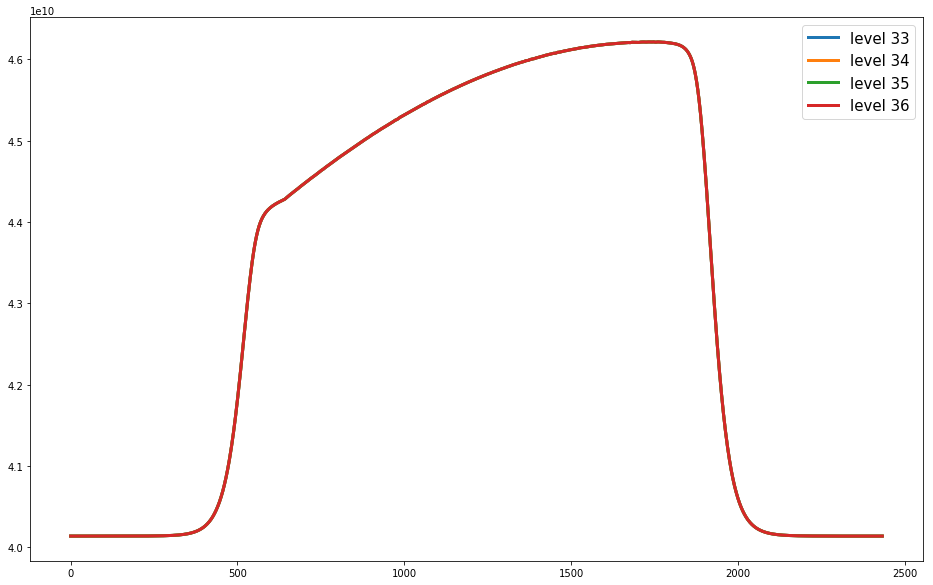

In [190]:
fig, ax = plt.subplots(figsize = (16,10))
nstart, nstop = 0, energies.shape[0]
for l in [32,33,34,35]:
    ax.plot(energies[nstart:nstop,l], label = 'level {0}'.format(l+1), lw = 3);
ax.legend(fontsize = 15)

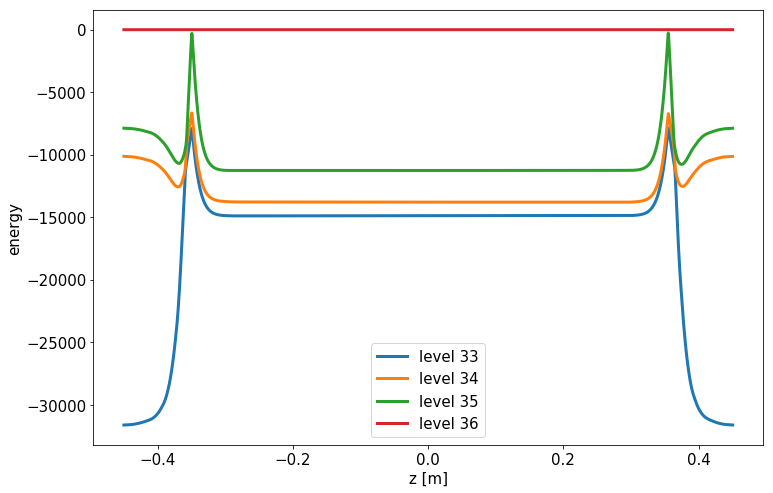

In [194]:
traj = interpolateTrajectories[0]

fig, ax = plt.subplots(figsize = (12,8))
nstart, nstop = 0, energies.shape[0]
for l in [32,33,34,35]:
    ax.plot(traj[2](np.array(t)), energies[nstart:nstop,l]-energies[nstart:nstop,35], label = 'level {0}'.format(l+1), lw = 3);
ax.legend(fontsize = 15)
ax.set_xlabel('z [m]')
ax.set_ylabel('energy')
set_fontsize(ax, 15)
fig.savefig('energies_earthfield.png', dpi = 150)

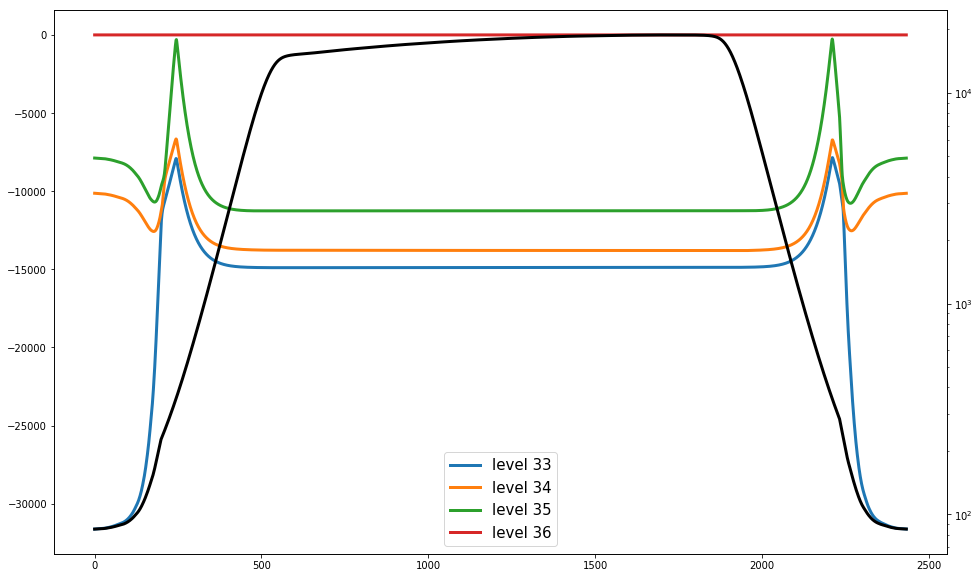

In [200]:
fig, ax = plt.subplots(figsize = (16,10))
nstart, nstop = 0, energies.shape[0]
for l in [32,33,34,35]:
    ax.plot(energies[nstart:nstop,l]-energies[nstart:nstop,35], label = 'level {0}'.format(l+1), lw = 3);
ax1 = ax.twinx()
xi = interpolateTrajectories[0][0](t)
yi = interpolateTrajectories[0][1](t)
zi = interpolateTrajectories[0][2](t)
Exi = funEx(xi, yi,zi)
Eyi = funEy(xi, yi,zi)
Ezi = funEz(xi, yi,zi)
E = np.sqrt(Exi**2+Eyi**2+Ezi**2)
ax1.plot(E, 'k', lw = 3)
ax1.set_yscale('log')
ax.legend(fontsize = 15)

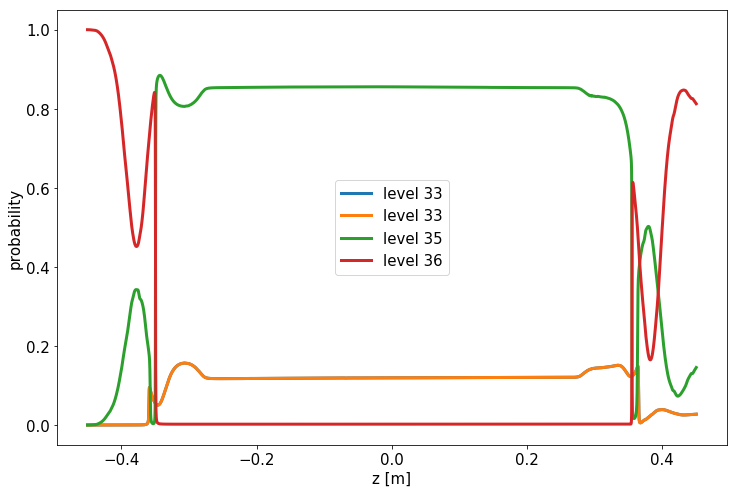

In [206]:
from propagation import *
probabilities = calculate_state_probabilities_eigvecs(phi, eigenvectors)

traj = interpolateTrajectories[0]

fig, ax = plt.subplots(figsize = (12,8))
for idL in [31,32,34,35]:
    ax.plot(traj[2](t), probabilities[:,idL], lw = 3, label = 'level {0}'.format(idL+1));
ax.legend(fontsize = 15)
ax.set_xlabel('z [m]')
ax.set_ylabel('probability')
set_fontsize(ax, 15)
fig.savefig('probability_earthfield.png', dpi = 150)

del traj, idL

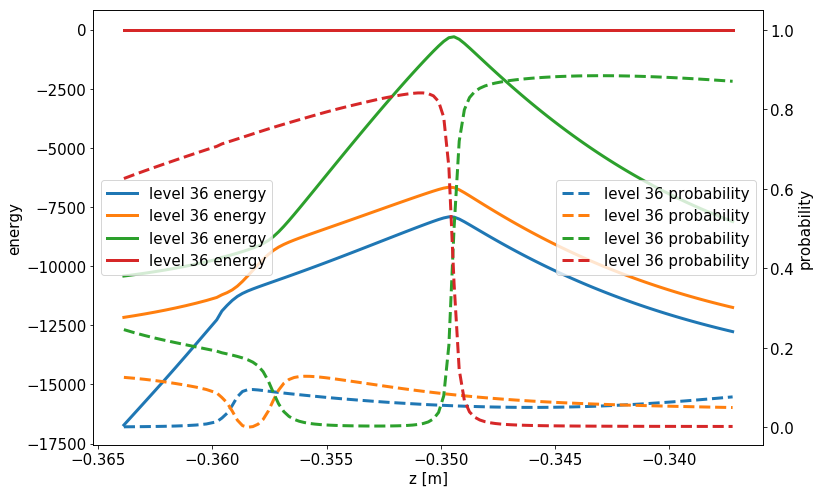

In [236]:
traj = interpolateTrajectories[0]

fig, ax = plt.subplots(figsize = (12,8))
nstart, nstop = 190, 300
for idL in range(32,36):
    ax.plot(traj[2](t[nstart:nstop]), energies[nstart:nstop,idL]-energies[nstart:nstop,35], label = 'level {0} energy'.format(idL+1), lw = 3);
ax.legend(loc = 6, fontsize = 15)
ax1 = ax.twinx()
for idL in range(32,36):
    ax1.plot(traj[2](t[nstart:nstop]), probabilities[nstart:nstop, idL], '--', lw = 3, label = 'level {0} probability'.format(idL+1));
ax1.legend(loc = 5, fontsize = 15)
ax1.set_ylim(ymax = 1.05);
ax.set_xlabel('z [m]')
ax.set_ylabel('energy')
ax1.set_ylabel('probability')
set_fontsize(ax, 15)
set_fontsize(ax1, 15)
fig.savefig('levels_probability_earthfield.png', dpi = 150)

del traj, idL

Text(0.5,0,'time [s]')

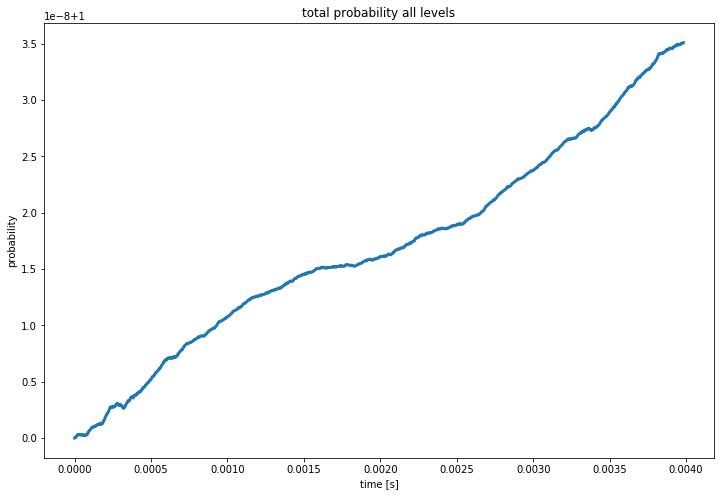

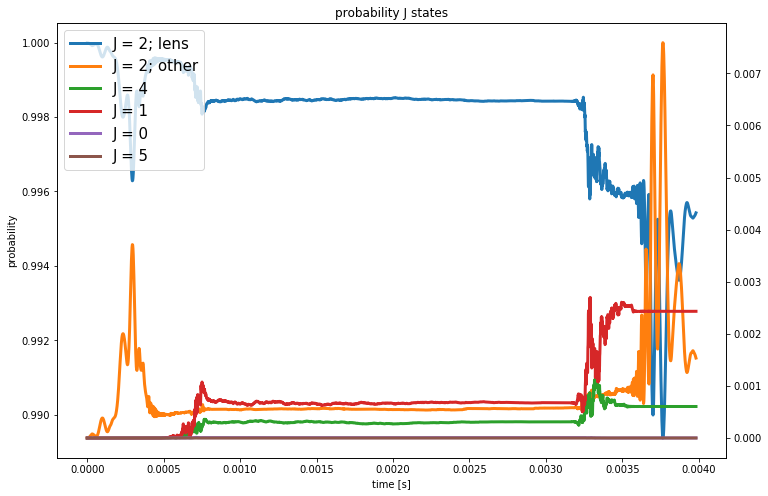

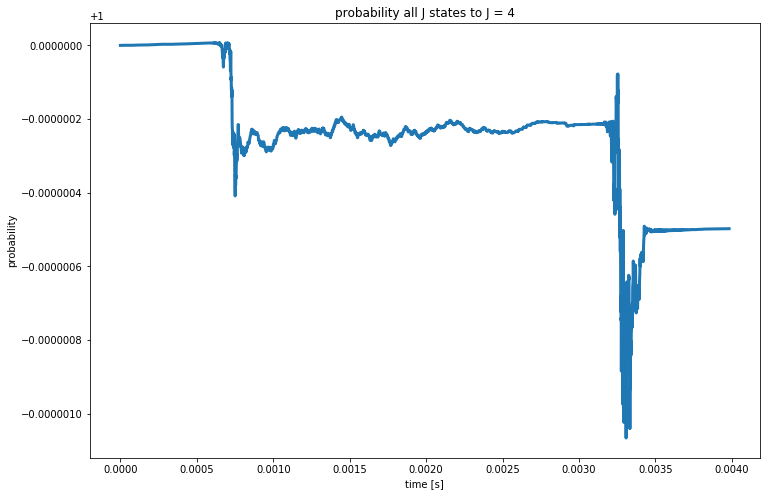

In [222]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('total probability all levels')
ax.plot(t, np.sum(probabilities, axis = 1), lw = 3)
ax.set_ylabel('probability')
ax.set_xlabel('time [s]')

fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('probability J states')
ax.plot(t, np.sum(probabilities[:,32:36], axis = 1), lw = 3, label = 'J = 2; lens')
ax.set_ylabel('probability')
ax.set_xlabel('time [s]')
ax1 = ax.twinx()
ax1.plot(t, np.sum(probabilities[:,16:32], axis = 1), 'C1', lw = 3, label = 'J = 2; other')
ax1.plot(t, np.sum(probabilities[:,36:64], axis = 1), 'C2', lw = 3, label = 'J = 4')
ax1.plot(t, np.sum(probabilities[:,4:16], axis = 1), 'C3', lw = 3, label = 'J = 1')
ax1.plot(t, np.sum(probabilities[:,:4], axis = 1), 'C4', lw = 3, label = 'J = 0')
ax1.plot(t, np.sum(probabilities[:,64:108], axis = 1), 'C5', lw = 3, label = 'J = 5')
ax.set_ylabel('probability')
ax.set_xlabel('time [s]')
lines, labels = ax.get_legend_handles_labels()
lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines + lines1, labels + labels1, fontsize = 15)

fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('probability all J states to J = 4')
ax.plot(t, np.sum(probabilities[:,:64], axis = 1), lw = 3)
ax.set_ylabel('probability')
ax.set_xlabel('time [s]')

In [237]:
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.colors as colors

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


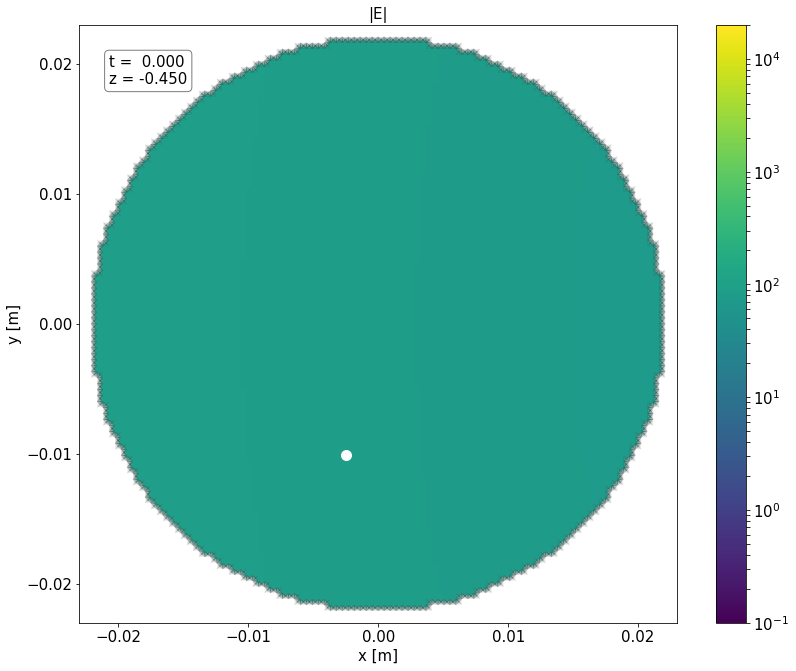

In [252]:
X,Y = np.meshgrid(np.linspace(-0.023,0.023,101), np.linspace(-0.023,0.023,101))
idT = 0
tArray = np.arange(0, interpolateTrajectories[idT][-1], 1e-6)
xi = interpolateTrajectories[idT][0](0)
yi = interpolateTrajectories[idT][1](0)
zi = interpolateTrajectories[idT][2](0)
Exi = funEx(X,Y,zi)
Eyi = funEy(X,Y,zi)
Ezi = funEz(X,Y,zi)
E = np.sqrt(Exi**2+Eyi**2+Ezi**2)
mask = np.invert(np.sqrt(X**2+Y**2) < 0.022)
E[mask] = np.nan
E = np.ma.array(E, mask=np.isnan(E))

# fig, ax = plt.subplots(figsize = (12,8))
# ax.plot(tArray, interpolateTrajectories[idT][0](tArray))
# ax.set_xlabel('time [s]')
# ax.set_ylabel('x [m]')

# fig, ax = plt.subplots(figsize = (12,8))
# ax.plot(tArray, interpolateTrajectories[idT][1](tArray))
# ax.set_xlabel('time [s]')
# ax.set_ylabel('y [m]')

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
textstr = 't = {0:>6.3f}\nz = {1:>6.3f}'.format(0,zi)

fig, ax = plt.subplots(figsize = (14,11))
line, = ax.plot(xi,yi,'w.', ms = 20)
# cax = ax.pcolormesh(X, Y, E, shading='gouraud', norm=colors.LogNorm(vmin=E[~np.isnan(E)].min(), vmax=E[~np.isnan(E)].max()))
cax = ax.pcolormesh(X, Y, E, shading='gouraud', norm=colors.LogNorm(vmin=1e-1, vmax=2e4))
cbar = fig.colorbar(cax)
ax.set_aspect(Y.ptp()/X.ptp())

txt = ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
ax.set_title('|E|')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]');
set_fontsize(ax, 15)
set_fontsize(cbar.ax, 15)

In [253]:
def init():
    line.set_data([],[])
    cax.set_data([],[])
    return line, cax

def animate(iter):
    iter *= 5
    ti = tArray[iter]
    zi = interpolateTrajectories[idT][2](ti)    
    Exi = funEx(X,Y,zi)
    Eyi = funEy(X,Y,zi)
    Ezi = funEz(X,Y,zi)
    E = np.sqrt(Exi**2+Eyi**2+Ezi**2)
    E[mask] = np.nan
    E = np.ma.array(E, mask=np.isnan(E))
    line.set_data(xi,yi)
    cax.set_array(E.ravel())
#     cbar.set_clim(E[~np.isnan(E)].min(), E[~np.isnan(E)].max())
    cbar.set_clim(1e-1, 2e4)
    cbar.draw_all()
    textstr = 't = {0:>10.3e} s\nz = {1:>12.3f} m'.format(ti,zi)
    txt.set_text(textstr)
    set_fontsize(ax, 15)
    set_fontsize(cbar.ax, 15)

In [254]:
anim = animation.FuncAnimation(fig,animate,frames=tArray[::5].size,interval=40,blit=False,repeat=True)
# anim = animation.FuncAnimation(fig,animate,frames=50,interval=40,blit=False,repeat=False)

In [255]:
%%time
HTML(anim.to_html5_video())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


Wall time: 3min 55s


# Shifted Electrode Plates 1 cm closer to quadrupole

In [ ]:
import numpy as np

rfp = open('potentialElectrodesShifted1cmR.fld', 'r')
tmp = rfp.read()
tmp = tmp.split('\n')[2:-1]
tmp = [[float(tis) for tis in ti.split()] for ti in tmp]

xPs = np.array([row[0] for row in tmp])
yPs = np.array([row[1] for row in tmp])
zPs = np.array([row[2] for row in tmp])
VPs = np.array([row[3] for row in tmp])

In [ ]:
mask = (np.sqrt(xPs**2+yPs**2) > 0.022)
VPs[mask] = np.nan

(xPs_vals, yPs_vals, zPs_vals), potPs_vals = create_grid_potential(xPs,yPs,zPs,VPs)

maskz = np.abs(zPs[np.invert(mask)] - 0.45) < 1e-4
cPs = polyfit2d(xPs[np.invert(mask)][maskz], yPs[np.invert(mask)][maskz], VPs[np.invert(mask)][maskz], [5,5])

In [ ]:
idx = find_nearest(xPs_vals, np.sqrt(0.019**2/2))
idy = find_nearest(yPs_vals, np.sqrt(0.019**2/2))

maskzP = zPs_vals > 0
f = np.abs(potPs_vals[idx, idy, :].flatten())[maskzP]
f -= f.min()
f /= f.max()

lP = maskzP.sum()
zPs_spliced = np.zeros(lP*2+1)
ind_sort = np.argsort(-zP_vals[maskzP])
zPs_spliced[:lP] = -zP_vals[maskzP][ind_sort]
zPs_spliced[-lP:] = zP_vals[maskzP]
fs_spliced = np.zeros(lP*2+1)
fs_spliced[:lP] = f[ind_sort]
fs_spliced[-lP:] = f

from scipy.interpolate import interp1d, UnivariateSpline
intfunPs = UnivariateSpline(zPs_spliced, fs_spliced, s = 0)

In [ ]:
x_cder = polynomial.polyder(c, axis = 0)
x_cPsder = polynomial.polyder(cPs, axis = 0)
y_cder = polynomial.polyder(c, axis = 1)
y_cPsder = polynomial.polyder(cPs, axis = 1)

Ex_tmp = lambda x,y,z: (intfunPs(z)*polynomial.polyval2d(x,y,x_cPsder)+intfun(z)*polynomial.polyval2d(x,y,x_cder))/100
Ey_tmp = lambda x,y,z: (intfunPs(z)*polynomial.polyval2d(x,y,y_cPsder)+intfun(z)*polynomial.polyval2d(x,y,y_cder))/100
Ez_tmp = lambda x,y,z: (intfunPs.derivative()(z)*polynomial.polyval2d(x,y,cPs)+intfun.derivative()(z)*polynomial.polyval2d(x,y,c))/100
Etot_tmp = lambda x,y,z: np.sqrt(Ex_tmp(x,y,z)**2+Ey_tmp(x,y,z)**2+Ez_tmp(x,y,z)**2)

In [ ]:
%%time
for traj in interpolateTrajectories[1:2]:
    xi = traj[0](0)
    yi = traj[1](0)
    zi = traj[2](0)
    Exi = Ex_tmp(xi,yi,zi)
    Eyi = Ey_tmp(xi,yi,zi)
    Ezi = Ez_tmp(xi,yi,zi)
    H0 = create_hamiltonian(Exi, Eyi, Ezi, 0, 20, 0)
    phi0 = np.linalg.eigh(H0)[1][:,35]
    t, phi = propagateExp(create_hamiltonian, phi0, traj, (0, 20, 0))
    tmp = []
    
for p in np.linalg.eigh(H0)[1].T:
    tmp.append(p.conj()@phi[-1])
ax.bar(np.arange(len(tmp)),np.abs(tmp)**2, label = '{0:6.2f} m'.format(di), alpha = 0.5)

print(np.abs(phi[-1].conj()@phi0)**2)

In [ ]:
zi = np.linspace(-.45,0.45,501)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(zi, Etot_tmp(1e-3,0,zi), lw = 3)
ax.plot(zi, Etottmp(1e-3,0,zi,0.01), '--', lw = 3)
ax.plot(zi, Etot(1e-3,0,zi)/100, lw = 3)

In [ ]:
zi = np.linspace(-.45,0.45,501)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(zi, Etot_tmp(1e-3,0,zi)-Etottmp(1e-3,0,zi,0.01), lw = 3)

In [ ]:
zi = np.linspace(-.45,-0.33,501)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(zi, Etot_tmp(1e-3,0,zi), lw = 3)
ax.plot(zi, Etottmp(1e-3,0,zi,0.01), '--', lw = 3)
ax.plot(zi, Etot(1e-3,0,zi)/100, lw = 3)

In [ ]:
zi = np.linspace(-.45,-0.33,101)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(zi, Ey_tmp(1e-3,0,zi), lw = 3)
ax.plot(zi, Eytmp(1e-3,0,zi,0.01), '--', lw = 3)
ax.plot(zi, intEy(1e-3,0,zi), '.', lw = 3)